<a href="https://colab.research.google.com/github/THARUNIKA28/Diabetes-Prediction/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv("/content/drive/MyDrive/diabetes.csv")

In [4]:
df.head(10)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: xlabel='Pregnancies'>

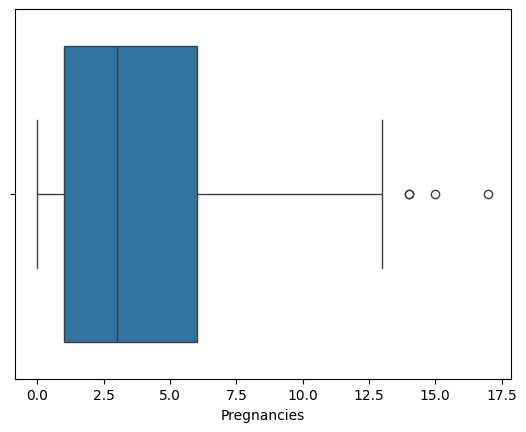

In [8]:
sns.boxplot(x=df["Pregnancies"])

<Axes: xlabel='DiabetesPedigreeFunction'>

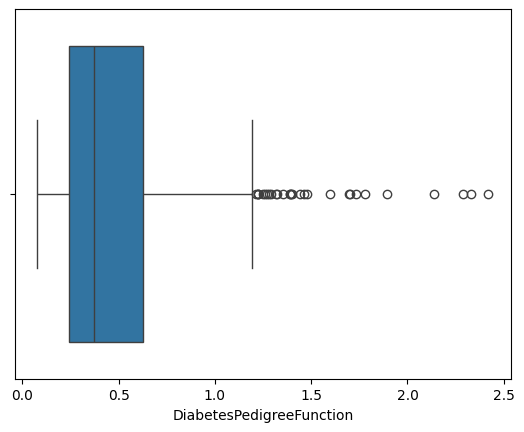

In [9]:
sns.boxplot(x=df["DiabetesPedigreeFunction"])

In [12]:
 numerical_features = df.select_dtypes(include='number').columns
for feature in numerical_features:
        cap_value = df[feature].quantile(0.99)
        df[feature] = df[feature].clip(upper=cap_value)

In [13]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.834635,120.882812,69.053385,20.433125,78.604427,31.936031,0.468372,33.205729,0.348958
std,3.336808,31.944693,19.243340,15.646206,109.425722,7.712781,0.314957,11.645318,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,13.000000,196.000000,106.000000,51.330000,519.900000,50.759000,1.698330,67.000000,1.000000


In [14]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128198,0.142412,-0.082750,-0.074050,0.021443,-0.028097,0.549591,0.219811
Glucose,0.128198,1.000000,0.152719,0.046852,0.329224,0.222230,0.126323,0.265376,0.466573
BloodPressure,0.142412,0.152719,1.000000,0.212438,0.094550,0.282023,0.045742,0.243597,0.064875
SkinThickness,-0.082750,0.046852,0.212438,1.000000,0.464733,0.391637,0.173638,-0.125786,0.069869
Insulin,-0.074050,0.329224,0.094550,0.464733,1.000000,0.203469,0.173267,-0.051472,0.132787
BMI,0.021443,0.222230,0.282023,0.391637,0.203469,1.000000,0.127110,0.045330,0.292042
DiabetesPedigreeFunction,-0.028097,0.126323,0.045742,0.173638,0.173267,0.127110,1.000000,0.039685,0.174154
Age,0.549591,0.265376,0.243597,-0.125786,-0.051472,0.045330,0.039685,1.000000,0.242215
Outcome,0.219811,0.466573,0.064875,0.069869,0.132787,0.292042,0.174154,0.242215,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

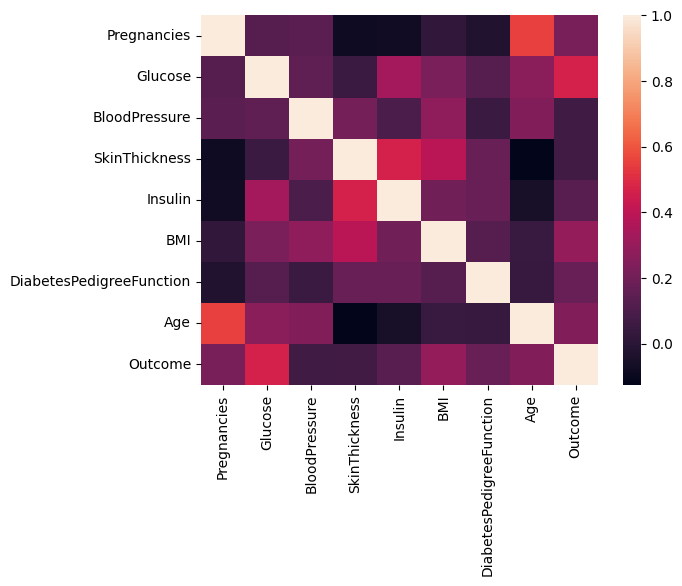

In [15]:
sns.heatmap(df.corr())
plt.show

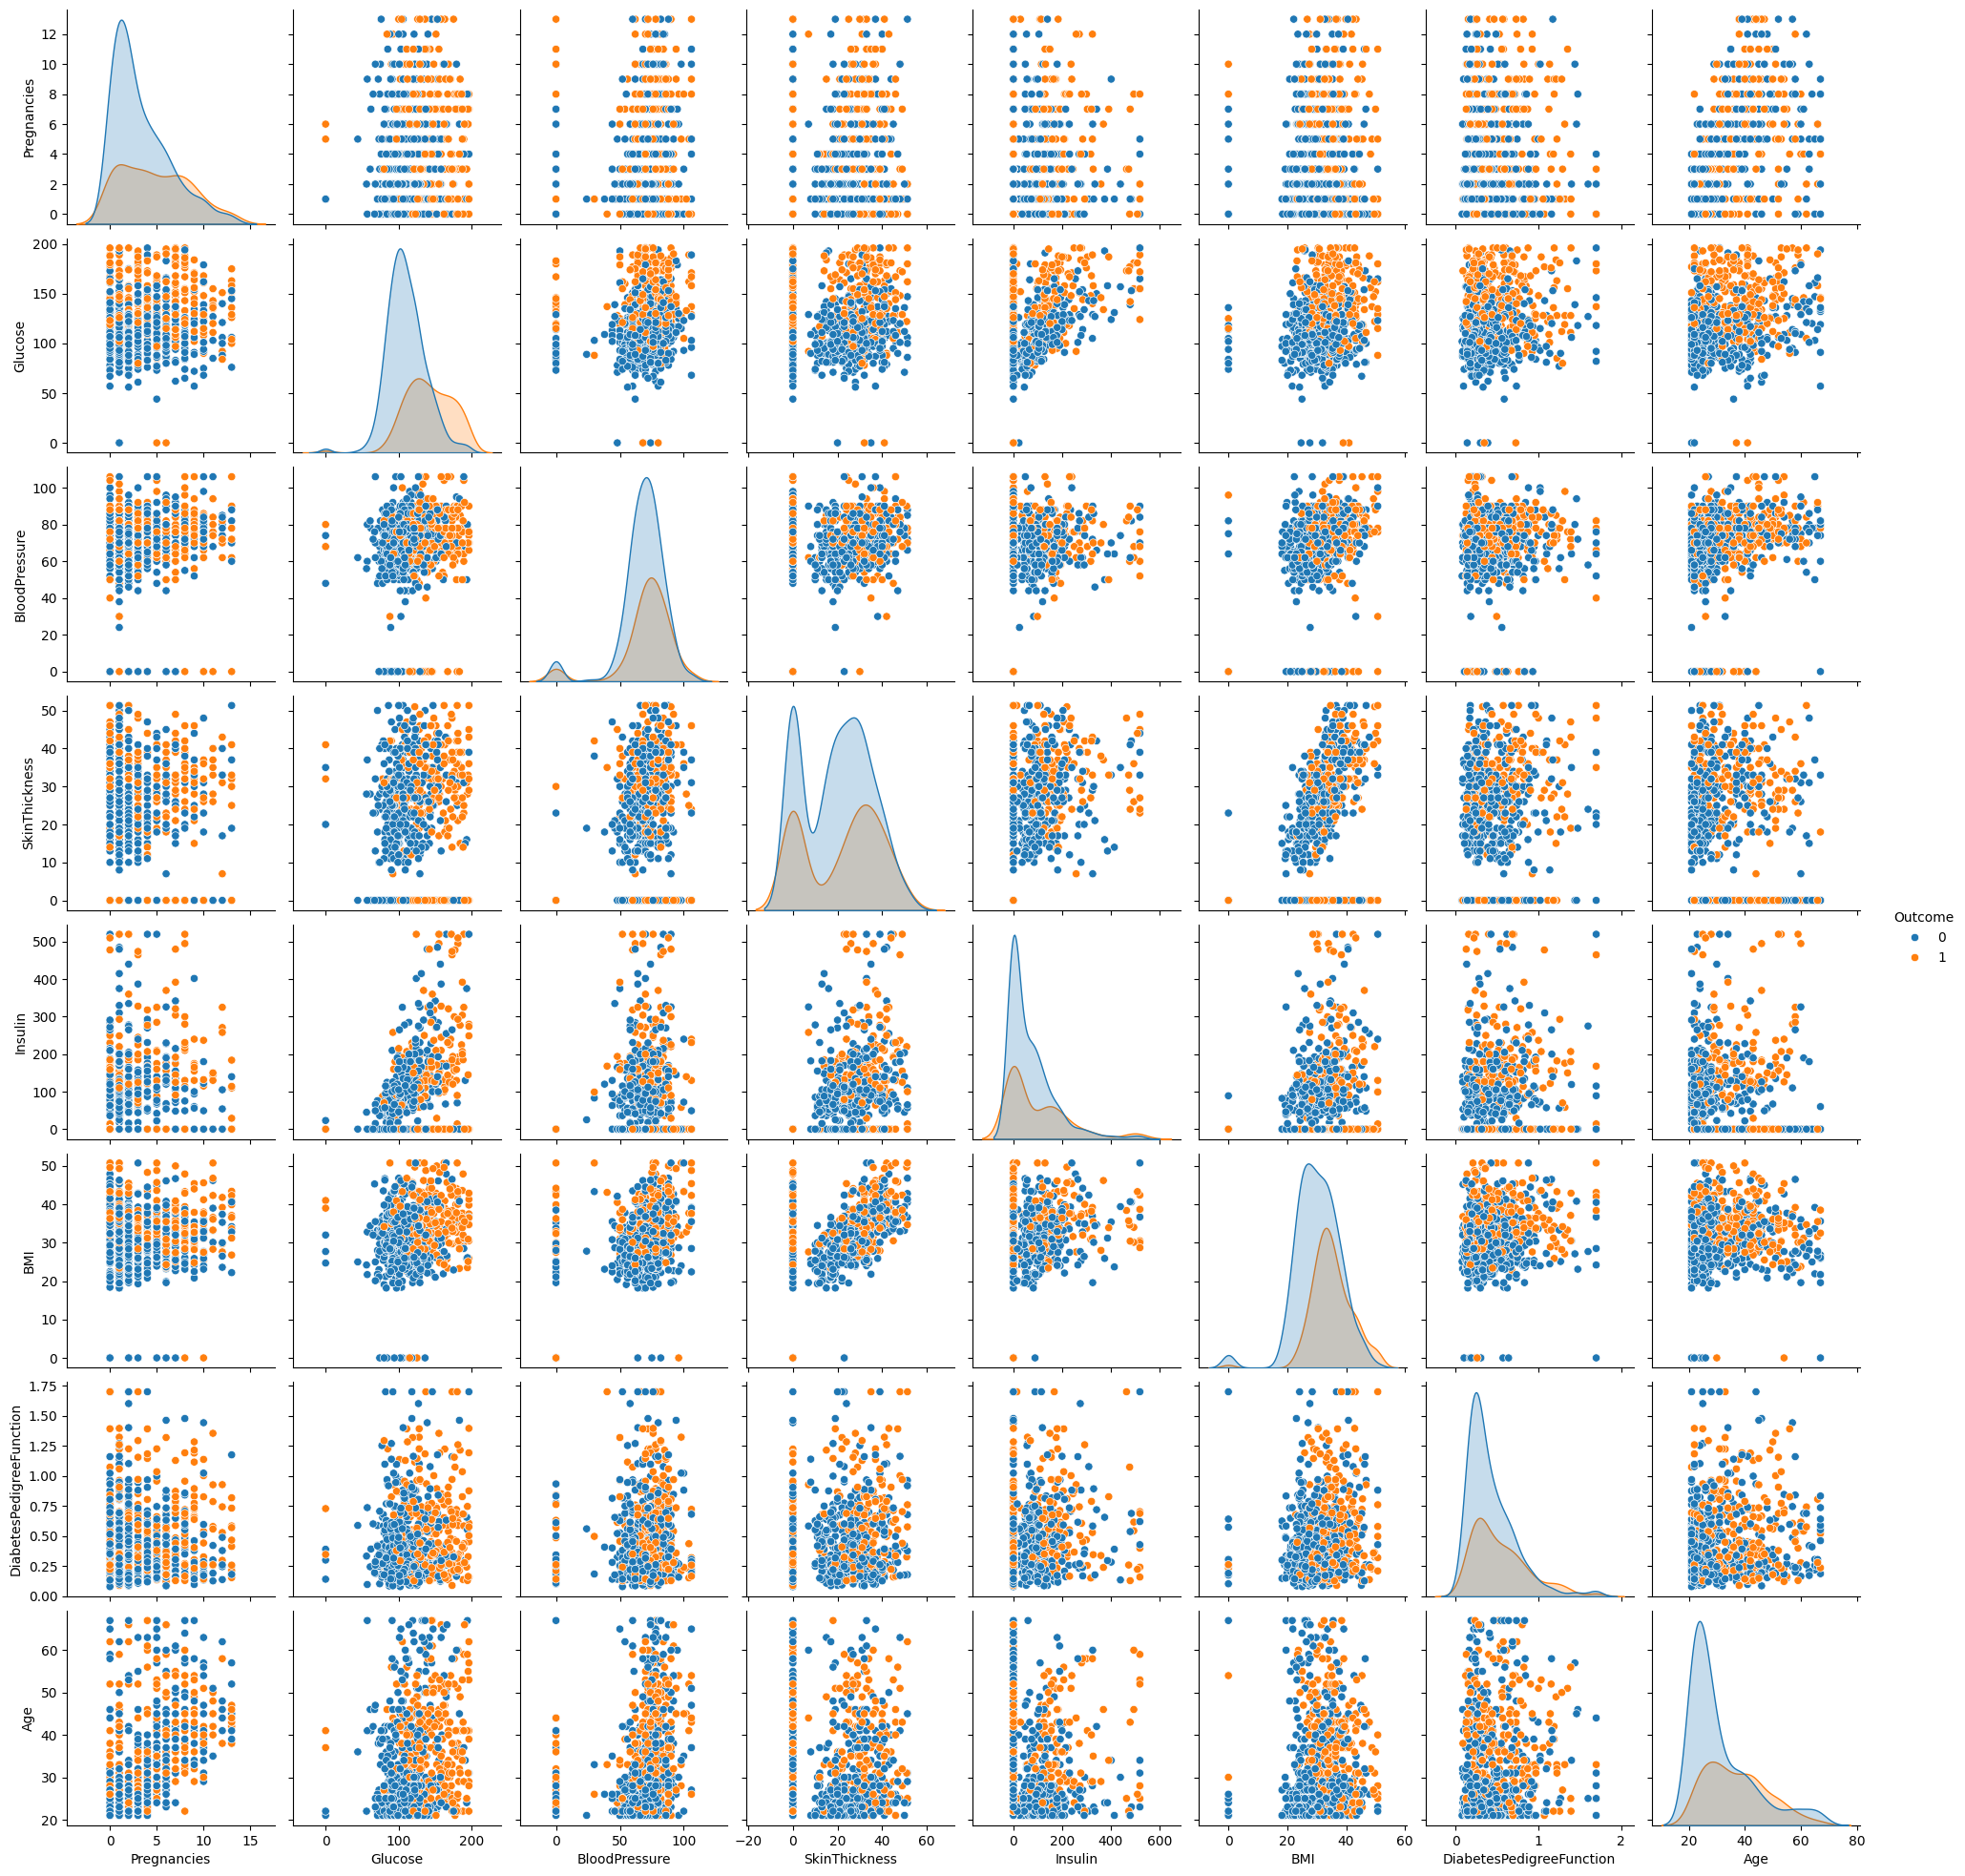

In [16]:
sns.pairplot(df, hue="Outcome")
plt.show()

In [17]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [18]:
#vertical split
X = df.drop(columns=["Outcome"])
Y = df["Outcome"]

In [19]:
#Horizontal split with train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(614, 8) (154, 8) (614,) (154,)


In [20]:
model1 = LogisticRegression()
model1.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
Y_pred = model1.predict(X_test)

In [22]:
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.75


In [23]:
#for decision Tree
model2 = DecisionTreeClassifier(random_state=0)
model2.fit(X_train, Y_train)


DecisionTreeClassifier(random_state=0)

In [24]:
model2.score(X_test, Y_test)

0.7467532467532467